In [1]:
# importing all the libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# to ensure all plots are embedded inline

In [2]:
# loading all the datasets

results = pd.read_csv('/Users/amritharaj/Desktop/F1 Data/results.csv')
races = pd.read_csv('/Users/amritharaj/Desktop/F1 Data/races.csv')
drivers = pd.read_csv('/Users/amritharaj/Desktop/F1 Data/drivers.csv')
constructors = pd.read_csv('/Users/amritharaj/Desktop/F1 Data/constructors.csv')
circuits = pd.read_csv('/Users/amritharaj/Desktop/F1 Data/circuits.csv')

In [3]:
# race id, year, name, round from races

df=pd.merge(results, races[['raceId','year','name','round','circuitId']], on='raceId', how='left')
df=pd.merge(df,circuits[['circuitId','country']], on='circuitId', how='left')
df=pd.merge(df,drivers[['driverId','driverRef','nationality']], on='driverId', how='left')
df=pd.merge(df,constructors[['constructorId','name','nationality']], on='constructorId', how='left')

In [5]:
# df.drop('number','position','positionText','laps','fastestLap','statusId','circuitId','resultId','raceId','driverId','constructorId',axis=1)

# renaming columns
df.rename(columns={'rank':'fastestLapRank','name_x':'GPname','driverRef':'driver','nationality_x':'nationalityDriver','name_y':'constructor','nationality_y':'nationalityConst'},inplace=True)

In [6]:
# rearrange columns
df=df[['year','GPname','round','driver','constructor','grid','positionOrder','points','time','milliseconds','fastestLapRank','fastestLapTime','fastestLapSpeed','nationalityDriver','nationalityConst']]

In [8]:
# dropping 2024 season
df=df[df['year']!=2024]

In [9]:
# sort values
df=df.sort_values(by=['year','round','positionOrder'], ascending=[False,True,True])

In [10]:
# replacing \N values in the time column
df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastestLapRank.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

/var/folders/cw/ycrs5gkd29vcgqcwczhn3c700000gn/T/ipykernel_63744/2500873228.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.time.replace('\\N',np.nan,inplace=True)
/var/folders/cw/ycrs5gkd29vcgqcwczhn3c700000gn/T/ipykernel_63744/2500873228.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [11]:
df.fastestLapRank = df.fastestLapRank.astype(float)
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [13]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.shape

(26280, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               26280 non-null  int64  
 1   GPname             26280 non-null  object 
 2   round              26280 non-null  int64  
 3   driver             26280 non-null  object 
 4   constructor        26280 non-null  object 
 5   grid               26280 non-null  int64  
 6   positionOrder      26280 non-null  int64  
 7   points             26280 non-null  float64
 8   time               7392 non-null   object 
 9   milliseconds       7392 non-null   float64
 10  fastestLapRank     8031 non-null   float64
 11  fastestLapTime     7805 non-null   object 
 12  fastestLapSpeed    7805 non-null   float64
 13  nationalityDriver  26280 non-null  object 
 14  nationalityConst   26280 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 3.0+ MB


In [17]:
df.head(10)

,year,GPname,round,driver,constructor,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,nationalityDriver,nationalityConst
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723.0,7.0,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373.0,5.0,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788.0,14.0,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713.0,10.0,1:36.546,201.802,British,German
5,2023,Bahrain Grand Prix,1,stroll,Aston Martin,8,6,8.0,+54.502,5691238.0,9.0,1:36.546,201.802,Canadian,British
6,2023,Bahrain Grand Prix,1,russell,Mercedes,6,7,6.0,+55.873,5692609.0,17.0,1:37.221,200.401,British,German
7,2023,Bahrain Grand Prix,1,bottas,Alfa Romeo,12,8,4.0,+1:12.647,5709383.0,18.0,1:37.379,200.075,Finnish,Swiss
8,2023,Bahrain Grand Prix,1,gasly,Alpine F1 Team,20,9,2.0,+1:13.753,5710489.0,2.0,1:35.068,204.939,French,French
9,2023,Bahrain Grand Prix,1,albon,Williams,15,10,1.0,+1:29.774,5726510.0,15.0,1:37.144,200.559,Thai,British


In [19]:
sb.set_palette('Set3')
# Set3 is pastel colours
plt.rcParams['figure.figsize']=10,6

([], [])

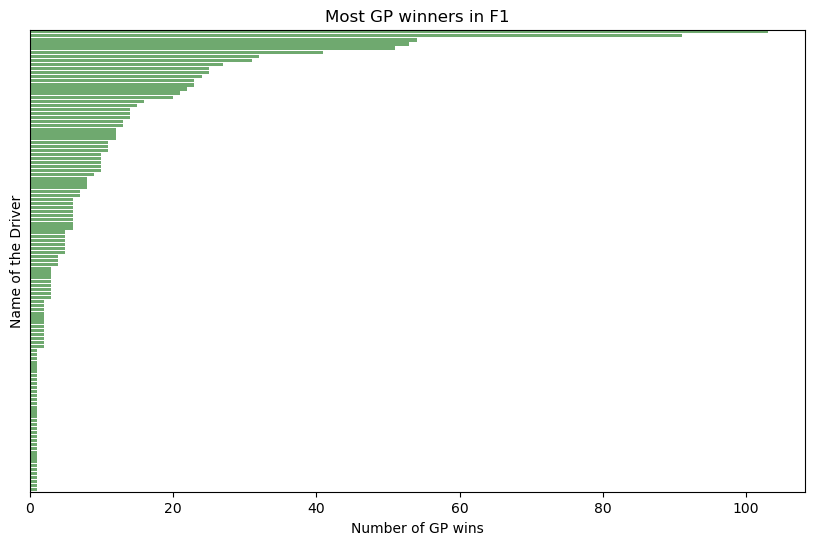

In [22]:
# GP driver winners Barplot
driver_winner = df.loc[df['positionOrder']==1] \
.groupby('driver')['positionOrder'].count() \
.sort_values(ascending=False) \
.to_frame().reset_index()

sb.barplot(data=driver_winner, y='driver',x='positionOrder',color='green',alpha=0.6)
plt.title('Most GP winners in F1')
plt.ylabel('Name of the Driver')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [23]:
# around 80% are less than 20
# a few between 20 and 55
# only countable ones have dominated with more than 55 wins

In [24]:
top10drivers = driver_winner.head(10)
top10drivers

,driver,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,max_verstappen,54
3,vettel,53
4,prost,51
5,senna,41
6,alonso,32
7,mansell,31
8,stewart,27
9,lauda,25


Text(0, 0.5, 'Name of the driver')

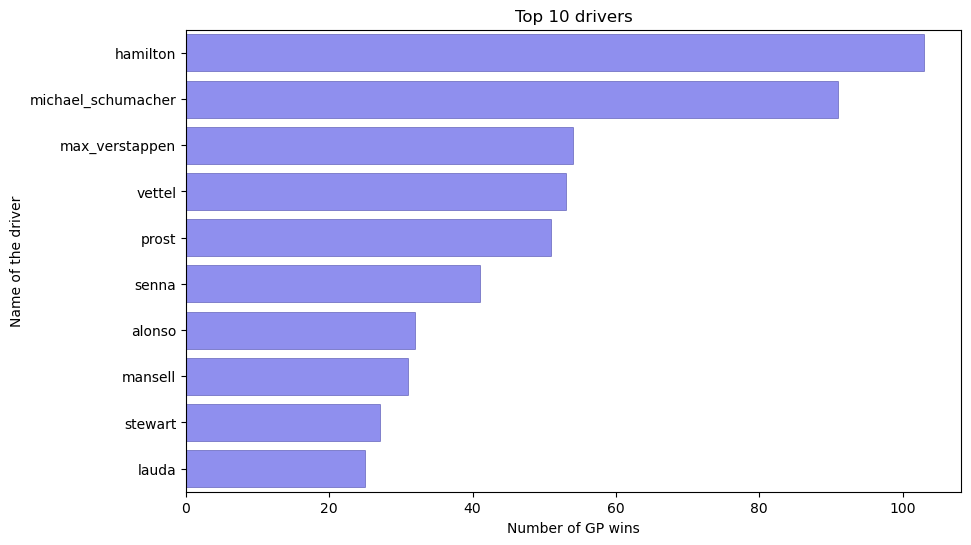

In [28]:
# plot of top 10 drivers
sb.barplot(data=top10drivers, y='driver',x='positionOrder',color='blue',alpha=0.5, linewidth=0.5, edgecolor='navy')
plt.title('Top 10 drivers')
plt.xlabel('Number of GP wins')
plt.ylabel('Name of the driver')

([], [])

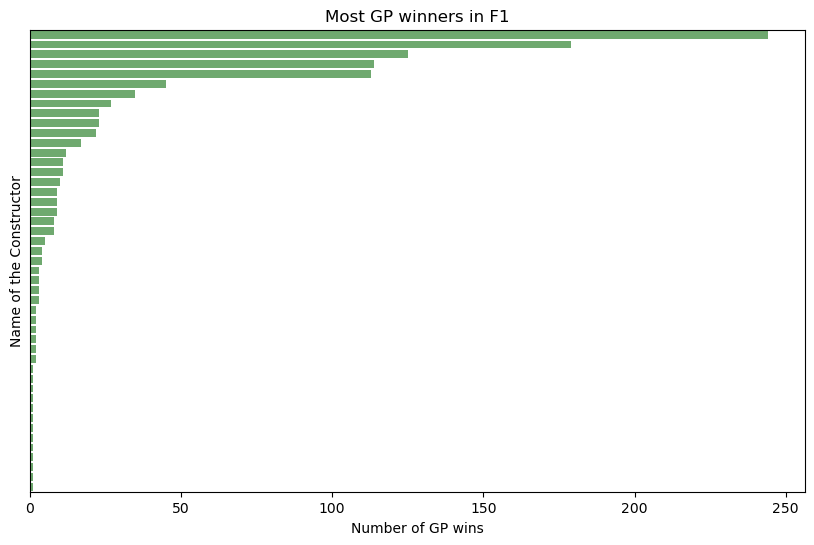

In [29]:
# GP constructor winners Barplot
const_winner = df.loc[df['positionOrder']==1] \
.groupby('constructor')['positionOrder'].count() \
.sort_values(ascending=False) \
.to_frame().reset_index()

sb.barplot(data=const_winner, y='constructor',x='positionOrder',color='green',alpha=0.6)
plt.title('Most GP winners in F1')
plt.ylabel('Name of the Constructor')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [23]:
# around 85% are less than 50
# only countable ones have dominated with more than 50 wins

In [30]:
top10const = const_winner.head(10)
top10const

,constructor,positionOrder
0,Ferrari,244
1,McLaren,179
2,Mercedes,125
3,Williams,114
4,Red Bull,113
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


Text(0, 0.5, 'Name of the constructor')

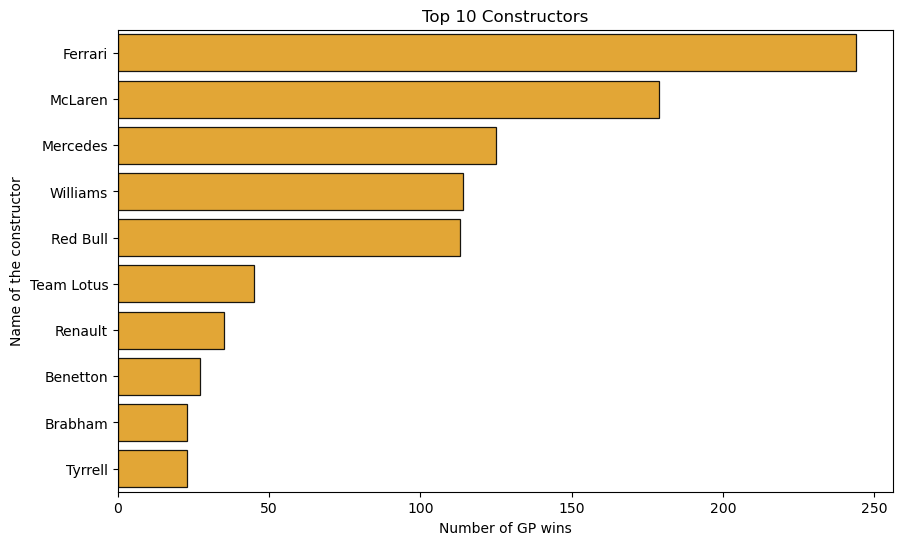

In [37]:
# plot of top 10 constructors
sb.barplot(data=top10const, y='constructor',x='positionOrder',color='orange',alpha=0.9, linewidth=0.9, edgecolor='black')
plt.title('Top 10 Constructors')
plt.xlabel('Number of GP wins')
plt.ylabel('Name of the constructor')

Text(0, 0.5, 'Finishing place')

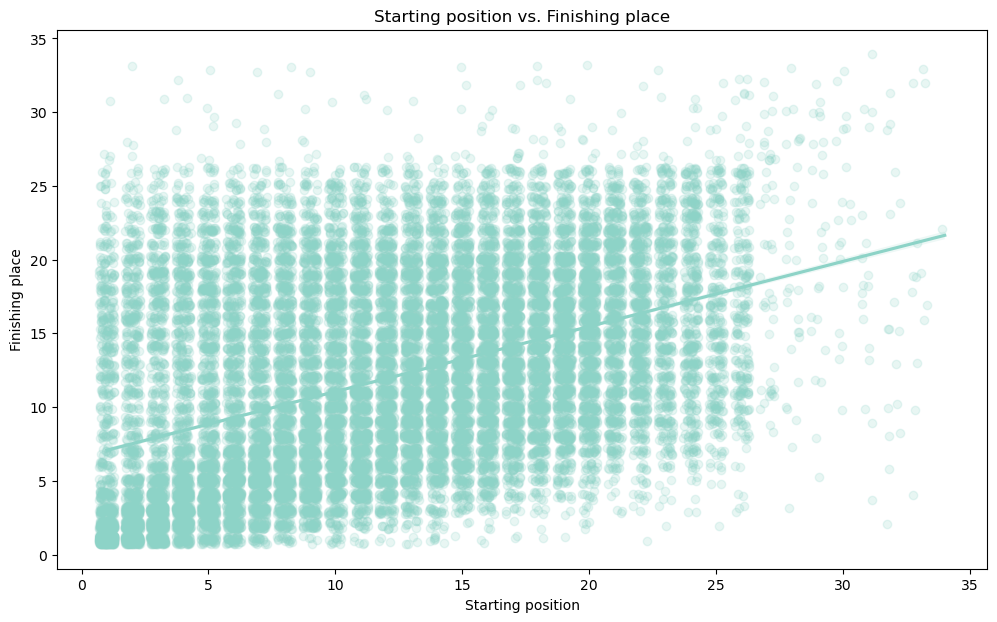

In [38]:
df_no0 = df[df['grid']!=0]

# create a regression plot
plt.figure(figsize=[12,7])
sb.regplot(data=df_no0, x='grid', y='positionOrder', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':1/5});
# x_jitter: Adds random noise to the x-coordinates of the data points
# y_jitter: Adds random noise to the y-coordinates of the data points
plt.title('Starting position vs. Finishing place')
plt.xlabel('Starting position')
plt.ylabel('Finishing place')

Text(0.5, 0.98, 'Avg speed amongst all teams during the fastest lap at individual GPs')

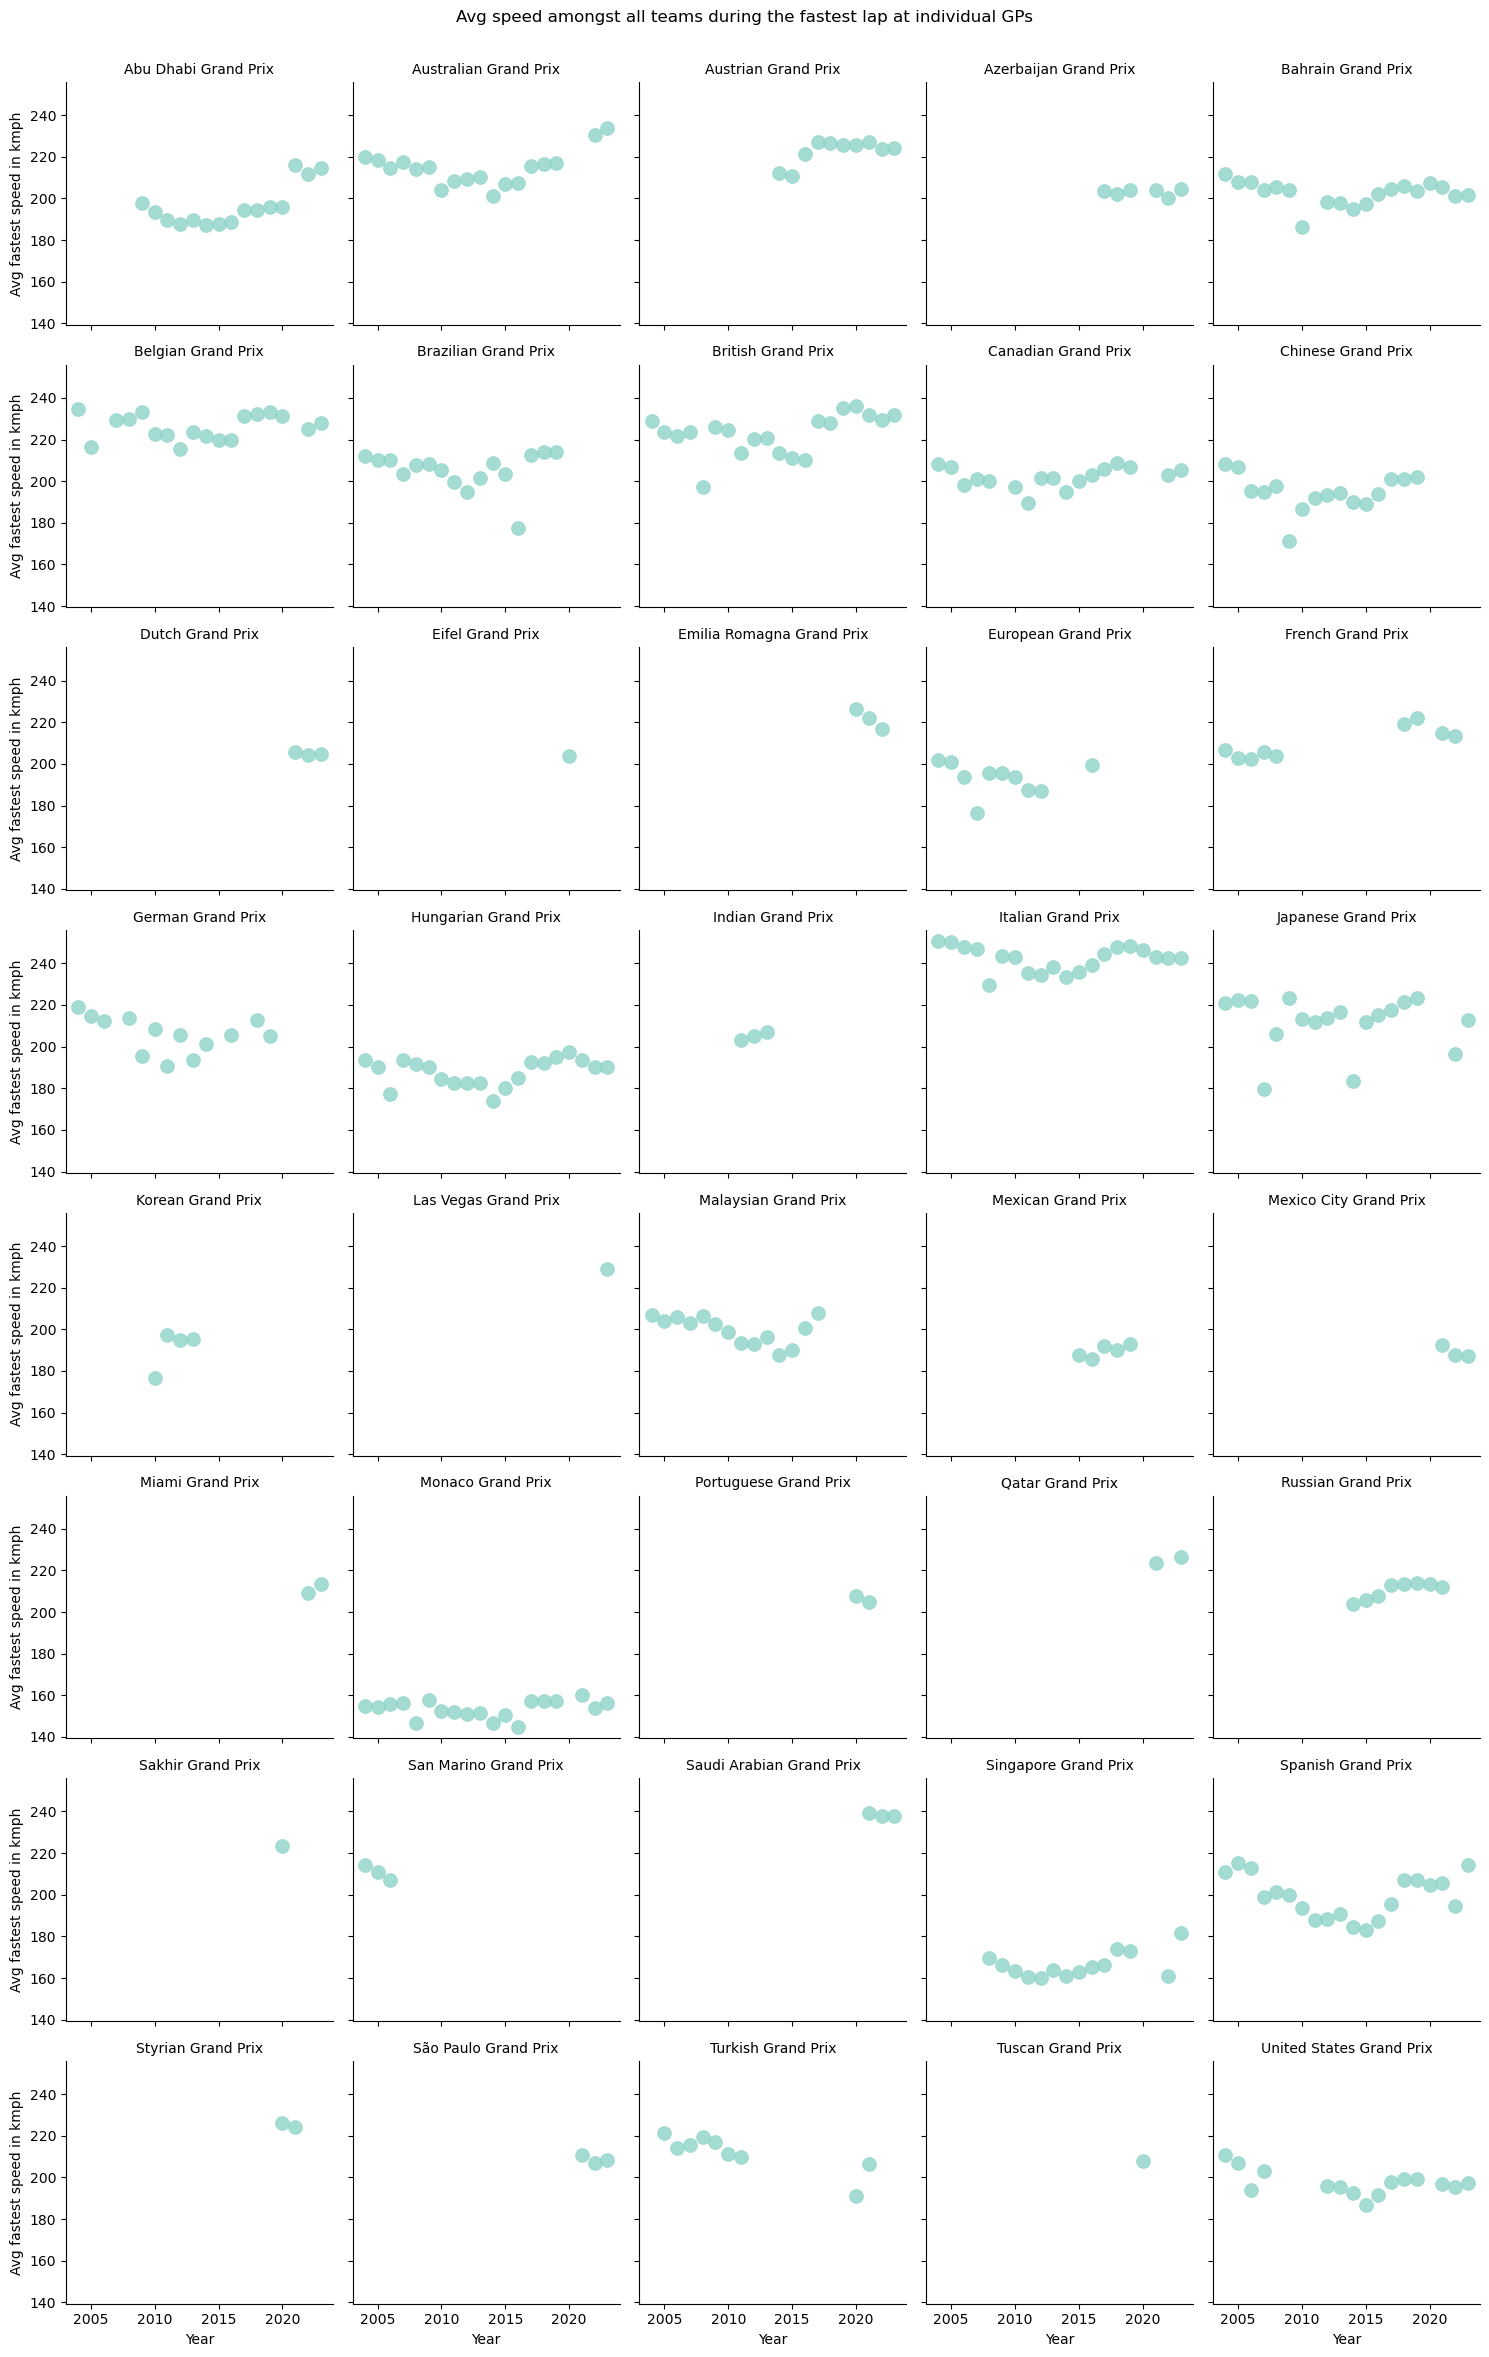

In [54]:
# creating new dataframe for seasons from the year 2000
df_speed = df[df['year']>=2000]
df_grp_speed = df_speed.groupby(['GPname', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

# removing the 70th Anniversary Grand Prix as it was held as a celebratory GP at Silverstone 7 days after Silverstone 2020
df_new = df_grp_speed[df_grp_speed['GPname'] != '70th Anniversary Grand Prix']

# create a facetgrid
fg = sb.FacetGrid(data=df_new, col='GPname', col_wrap=5)
fg.map(plt.scatter, 'year', 'fastestLapSpeed', alpha=0.8, linewidth=0.5, s=100)
fg.set_titles('{col_name}')
fg.set_xlabels('Year')
fg.set_ylabels('Avg fastest speed in kmph')
plt.subplots_adjust(top=0.95)
fg.fig.suptitle('Avg speed amongst all teams during the fastest lap at individual GPs')

In [ ]:
# dec in the avg fastest lap from 2004 to 2015 and then starts to increase
# speed is diff on each track
# italian gp has fastest avg speed while monaco is the slowest
# exploratory data analysis on f1 gps